In [1]:
from headers_constants import *
from Cell_cib import *
from Cell_tSZ import *
from Cell_CIBxtSZ import *
from plot_cell import *
from input_var import *

Although we are calculating the halo mass function, halo bias, and the
Fourier transform of the NFW profile here, the computation can be speeded up
by precomputing them before and storing them in a file and then reading
them here.

In [2]:
Planck = {'name': 'Planck',
          'do_cib': 1, 'do_tsz': 1, 'do_cibxtsz': 1,
          'freq_cib': [100., 143., 217., 353., 545., 857.],
          'cc': np.array([1.076, 1.017, 1.119, 1.097, 1.068, 0.995, 0.960]),
          'cc_cibmean': np.array([1.076, 1.017, 1.119, 1.097, 1.068, 0.995, 0.960]),
          'freq_cibmean': np.array([100., 143., 217., 353., 545., 857.]),
          'fc': np.ones(7),
          }

Herschel = {'name': 'Herschel-spire',
            'do_cib': 1, 'do_tsz': 0, 'do_cibxtsz': 0,
            'freq_cib': [600., 857., 1200.],
            'cc': np.array([0.974, 0.989, 0.988]),
            'cc_cibmean': np.array([0.974, 0.989, 0.988]),
            'freq_cibmean': np.array([600., 857., 1200.]),
            'fc': np.ones(3),
            }

CCAT = {'name': 'CCAT-p',
        'do_cib': 1, 'do_tsz': 0, 'do_cibxtsz': 0,
        'freq_cib': [220., 280., 350., 410., 850.],
        'cc': np.ones(5),
        'cc_cibmean': np.ones(5),
        'freq_cibmean': np.array([220., 280., 350., 410., 850.]),
        'fc': np.ones(5),
         }

In [3]:
exp = Planck

Specify multipole, mass, and redshift range

In [4]:
ell = np.linspace(2, 1e4, 5000)
redshifts = np.loadtxt('data_files/redshifts.txt')
z1 = np.linspace(min(redshifts), max(redshifts), 200)

z = redshifts  # z1  # redshifts

logmass = np.arange(6, 15.005, 0.1)
mass = 10**logmass

In [5]:
driver = data_var(exp, mass, z, ell)

Calculating the halo mass function, halo bias, nfw profile for given mass and redshift for CIB calculations.
Calculating the halo mass function, halo bias, nfw profile for given mass and redshift for tSZ calculations.


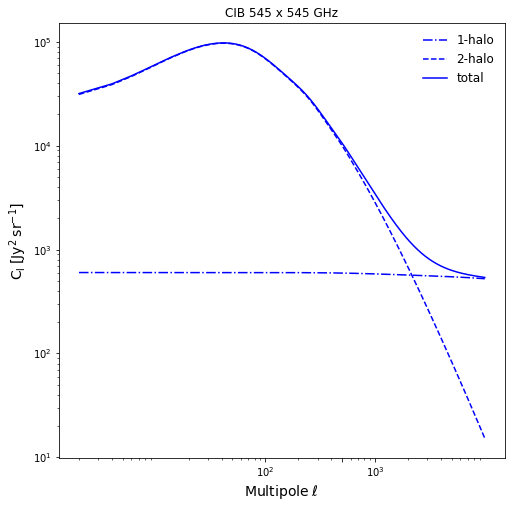

In [6]:
if exp['do_cib'] == 1:
    clcib = cl_cib(driver)
    
    cl1h_cib = clcib.onehalo_int()
    cl2h_cib = clcib.twohalo_int()
    
    # plotting the CIB power spectra for freq[nu1]xfreq[nu2] GHz
    
    # fam = "serif"
    # plt.rcParams["font.family"] = fam
    
    freq = ['100', '143', '217', '353', '545', '857']
    nu1, nu2 = 4, 4
    plot_Cell(ell, cl1h_cib, cl2h_cib, nu1, nu2, freq, 'CIB')

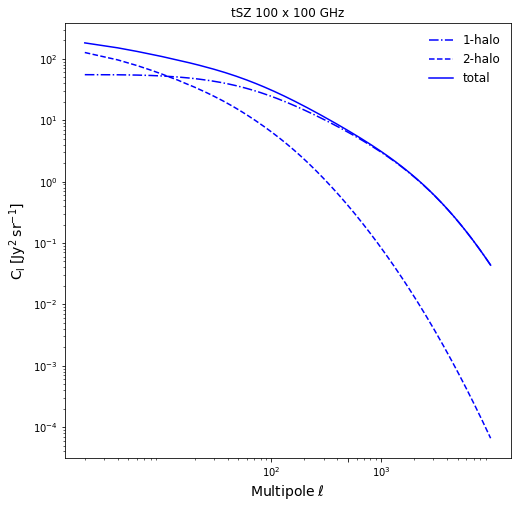

In [7]:
if exp['do_tsz'] == 1:
    cltsz = cl_tsz(driver)
    cl1h_tsz = cltsz.C_ell_1h()
    cl2h_tsz = cltsz.C_ell_2h()
    
    # plotting the tSZ power spectra for freq[nu1]xfreq[nu2] GHz
    freq = ['100', '143', '217', '353', '545', '857']
    nu1, nu2 = 0, 0
    plot_Cell(ell, cl1h_tsz, cl2h_tsz, nu1, nu2, freq, 'tSZ')

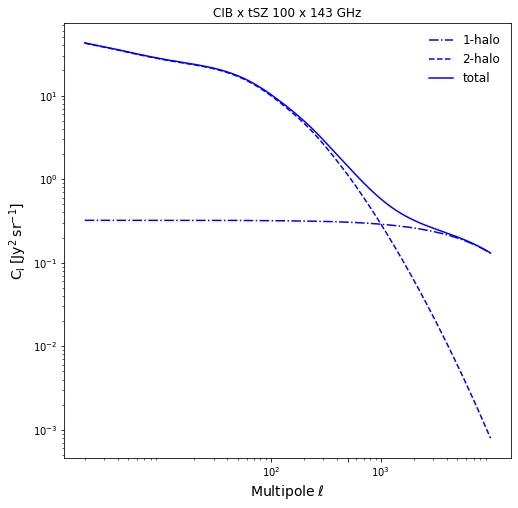

In [8]:
if exp['do_cibxtsz'] == 1:
    # """
    cib_cls = cl_cib(driver)
    tsz_cls = cl_tsz(driver)
    cibtsz = cl_cibxtsz(cib_cls, tsz_cls)
    cl1h_cibtsz = cibtsz.onehalo()  # *Kcmb_MJy*1e6
    cl2h_cibtsz = cibtsz.twohalo()

    # plotting the CIBxtSZ power spectra for freq[nu1]xfreq[nu2] GHz
    freq = ['100', '143', '217', '353', '545', '857']
    nu1, nu2 = 0, 1
    plot_Cell(ell, cl1h_cibtsz, cl2h_cibtsz, nu1, nu2, freq, 'CIB x tSZ')